# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Новый раздел

# 4. Домашнее задание
***

https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/download

In [1]:
import numpy as np
import pandas as pd
import math
#import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi_reg_loc = pd.read_csv("kiva_mpi_region_locations.csv")
df_loan_theme_ids = pd.read_csv("loan_theme_ids.csv")
df_loan_themes_by_reg = pd.read_csv("loan_themes_by_region.csv")

## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)

In [3]:
print('Страны, в которых преобладают мужчины: ')

group_country = df_kiva_loans[df_kiva_loans.borrower_genders.notna()]\
    .groupby('country')\
    .agg(is_male_more = ('borrower_genders',\
        lambda x: sum([i.count('male') - 2 * i.count('female') for i in list(x.values)]) > 0))
group_country[group_country.is_male_more].drop(columns=['is_male_more'])

Страны, в которых преобладают мужчины: 


""
country
Azerbaijan
Belize
China
Egypt
Kosovo
Lao People's Democratic Republic
Mauritania
Mongolia
Nigeria


In [4]:
print('Страны, в которых преобладают группы людей: ')

group_country = df_kiva_loans[df_kiva_loans.borrower_genders.notna()]\
    .groupby('country')\
    .agg(is_group_more = ('borrower_genders',\
        lambda x: sum([-1 if i == 'male' or i == 'female' else 1 for i in list(x.values)]) > 0))
group_country[group_country.is_group_more].drop(columns=['is_group_more'])

Страны, в которых преобладают группы людей: 


""
country
Benin
Brazil
Burkina Faso
Burundi
Cambodia
Chile
Congo
Dominican Republic
Ghana


#  
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)

In [5]:
df_kiva_loans['sex_type'] = [x if x in ['male', 'female'] else 'group'  for x in df_kiva_loans.borrower_genders]
df = df_kiva_loans.sort_values('funded_amount', ascending = False).head(100).copy()

def top_100_bar(column, string, rot = 0):
    plt.figure(figsize=(20,10))
    plt.title("Топ 100 займов " + string, fontsize=16)
    plt.tick_params(labelsize=14)
    plt.xticks(rotation=rot)
    sns.barplot(y=column.values, x=column.index, alpha=0.6)
    plt.show()

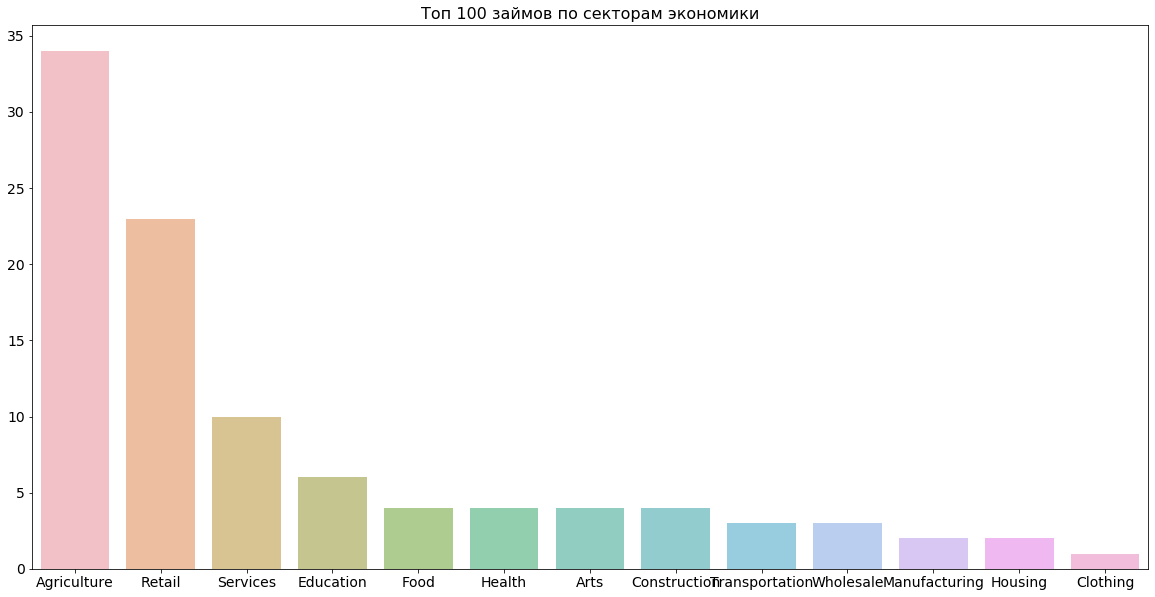

In [6]:
top_100_bar(df.sector.value_counts(), 'по секторам экономики')

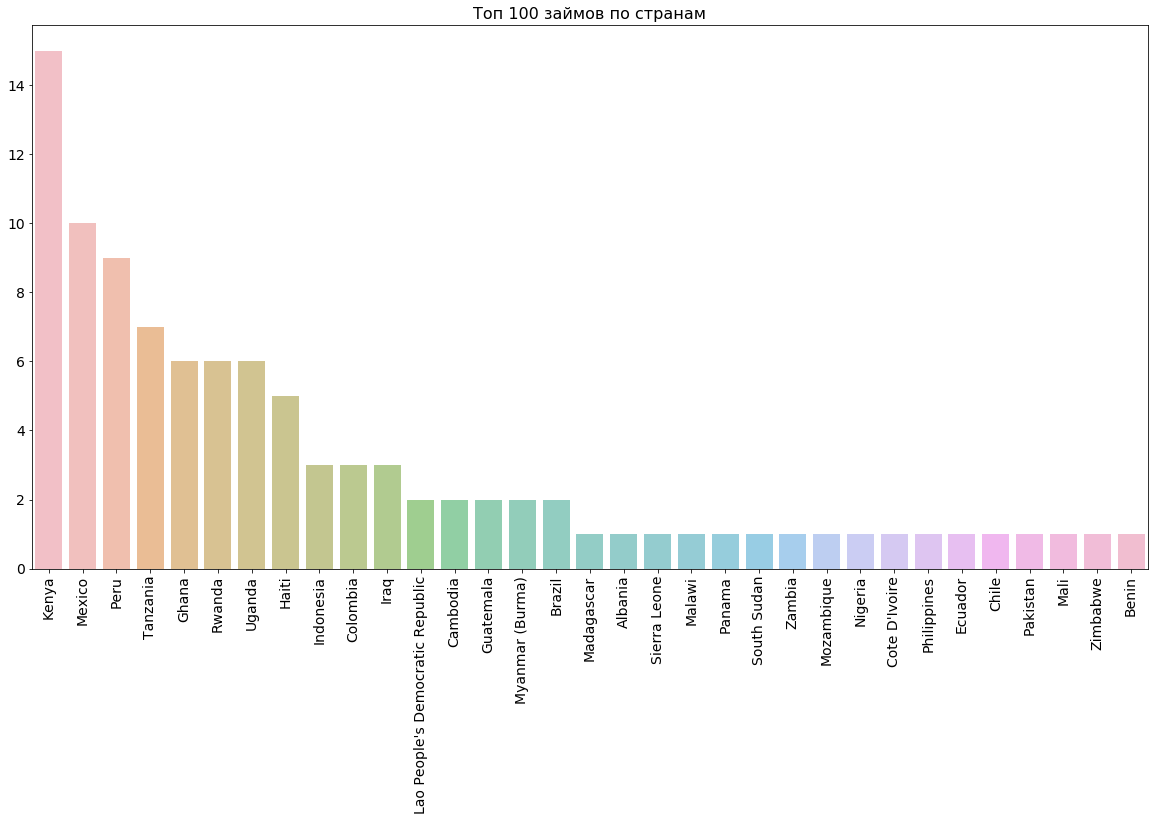

In [7]:
top_100_bar(df.country.value_counts(), 'по странам', 90)

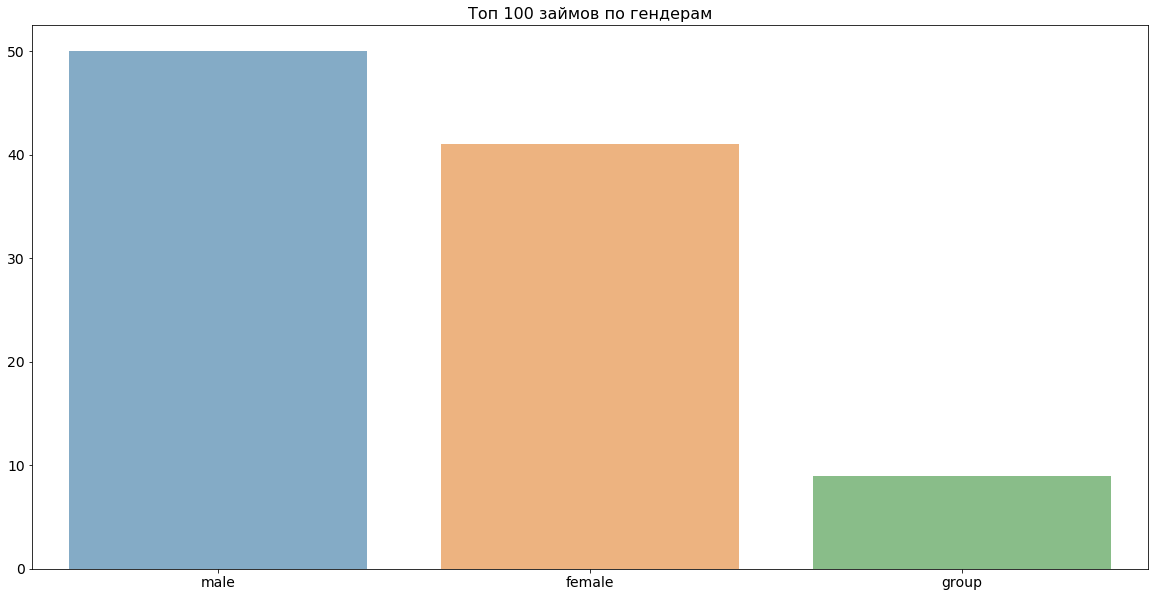

In [8]:
top_100_bar(df.sex_type.value_counts(), 'по гендерам')

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

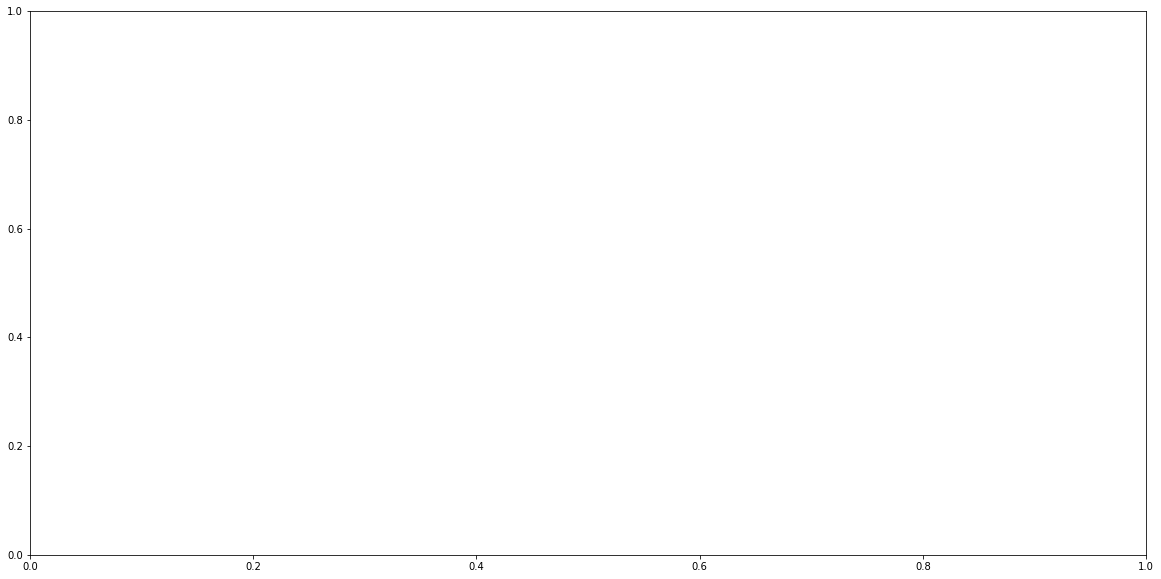

In [16]:
df = df_kiva_loans.copy()

plt.figure(figsize=(20,10))
ax = plt.subplot(111)

regions = df.region.unique()
x = np.arange(len(regions))

rects = list()
names = list()

i = -0.2
for name, group in df.groupby('sex_type'):
    rec = ax.bar(x + i, group.region.value_counts().values, width=0.2)
    rects.append(rec)
    names.append(name)
    i += 0.2
ax.legend(rects, names, fontsize=20)
ax.set_xticks(x)
ax.set_title("Зависимость пола заёмщика от региона планеты", fontsize=16)
ax.set_xticklabels(list(regions), rotation=45, fontsize=15)
plt.show()

In [17]:
group.sector.value_counts()

Agriculture       99605
Food              98762
Retail            96533
Services          30392
Housing           23024
Clothing          22795
Education         18024
Arts               8834
Personal Use       8834
Transportation     8046
Health             5262
Manufacturing      3206
Construction       2488
Entertainment       389
Wholesale           308
Name: sector, dtype: int64

[3.8, -0.2, 6.8, 2.8, 12.8, 7.8, 10.8, 1.8, 11.8, 0.8, 9.8, 4.8, 8.8, 13.8, 5.8]
[4.0, 0.0, 12.0, 7.0, 8.0, 3.0, 13.0, 2.0, 11.0, 10.0, 9.0, 5.0, 1.0, 6.0, 14.0]
[4.2, 0.2, 7.2, 11.2, 3.2, 13.2, 12.2, 1.2, 9.2, 10.2, 8.2, 5.2, 2.2, 14.2, 6.2]


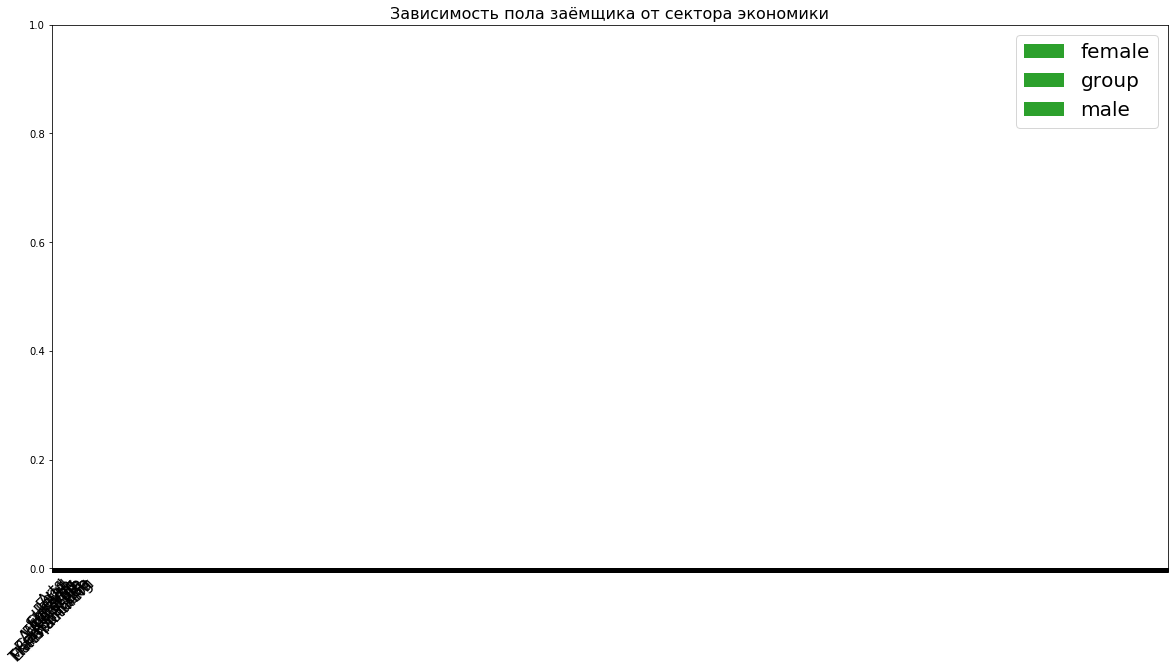

In [23]:
df = df_kiva_loans.copy()

plt.figure(figsize=(20,10))
ax = plt.subplot(111)

sectors = list(df.sector.unique())

rects = list()
names = list()

i = -0.2
for name, group in df.groupby('sex_type'):
    sec = group.sector.value_counts()
    print([sectors.index(x) + i for x in sec.index])
#     rec = ax.bar([sectors.index(x) + i for x in sec.index], sec.values, width=0.2)
    rects.append(rec)
    names.append(name)
    i += 0.2
ax.legend(rects, names, fontsize=20)
ax.set_xticks(x)
ax.set_title("Зависимость пола заёмщика от сектора экономики", fontsize=16)
ax.set_xticklabels(sectors, rotation=45, fontsize=15)
plt.show()